In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/times.ttf')
plt.rc('font',family='Times New Roman')

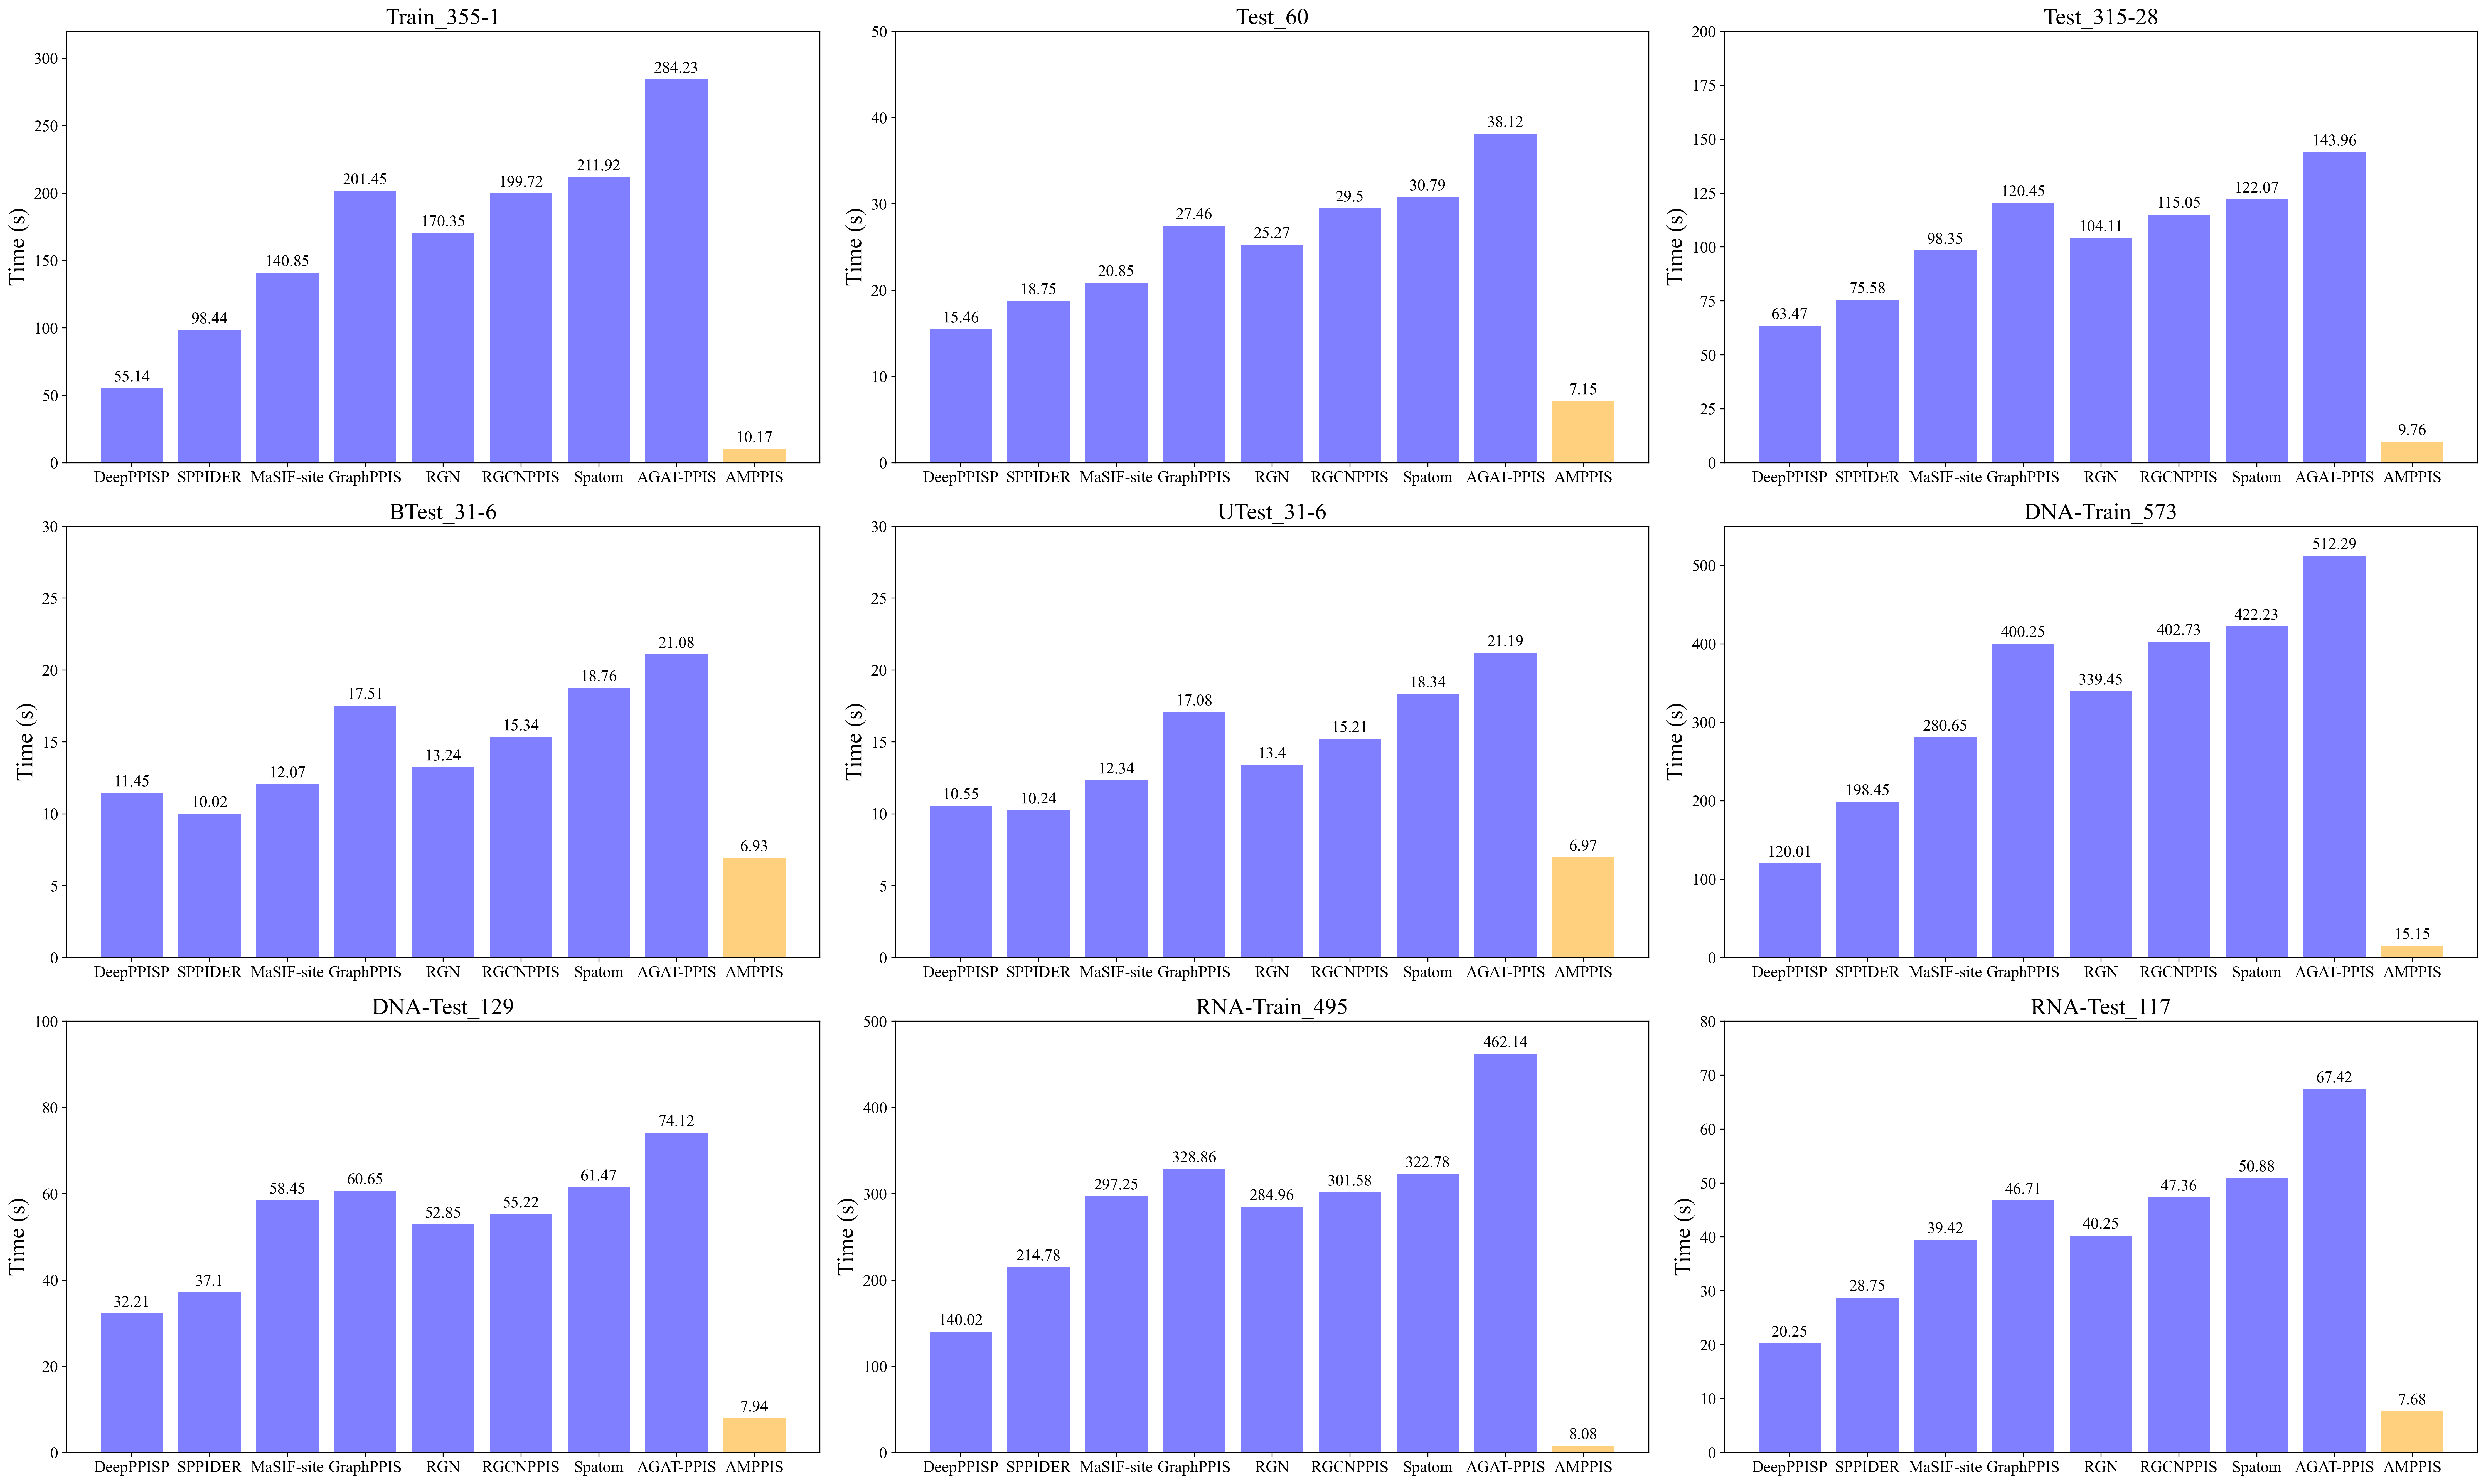

In [57]:
datasets =["Train_355-1","Test_60","Test_315-28","BTest_31-6","UTest_31-6","DNA-Train_573", "DNA-Test_129", "RNA-Train_495", "RNA-Test_117"]
methods = ["DeepPPISP", "SPPIDER", "MaSIF-site", "GraphPPIS", "RGN", "RGCNPPIS", "Spatom", "AGAT-PPIS", "AMPPIS"]
color =["blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "orange"]
ylim = [320, 50, 200, 30, 30, 550, 100, 500, 80]
width=0.5
group_width=6
bar_width = 0.8
x = np.arange(0,len(datasets)*group_width,group_width)
dx = [x, x+width, x+2*width, x+3*width, x+4*width, x+5*width, x+6*width, x+7*width, x+8*width]
data=[
    [55.14, 15.46,  63.47,11.45,10.55,120.01, 32.21, 140.02,20.25], # DeepPPISP
    [98.44, 18.75,  75.58,10.02,10.24,198.45, 37.10, 214.78,28.75], # SPPIDER
    [140.85,20.85,  98.35,12.07,12.34,280.65, 58.45, 297.25,39.42], # MaSIF-site
    [201.45,27.46, 120.45,17.51,17.08,400.25, 60.65, 328.86,46.71], # GraphPPIS
    [170.35,25.27, 104.11,13.24,13.40,339.45, 52.85, 284.96,40.25], # RGN
    [199.72,29.50, 115.05,15.34,15.21,402.73, 55.22, 301.58,47.36], # RGCNPPIS
    [211.92,30.79, 122.07,18.76,18.34,422.23, 61.47, 322.78,50.88], # Spatom
    [284.23,38.12, 143.96,21.08,21.19,512.29, 74.12, 462.14,67.42], # AGAT-PPIS
    [10.17,  7.15,   9.76, 6.93, 6.97, 15.15, 7.94,    8.08, 7.68],# AMPPIS
]
data = np.array(data)

plt.rcParams.update({'font.size': 14})
plt.subplots(3,3, figsize=(30,18), dpi=300)
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.bar(methods, data[:,i], width=bar_width, color=color,alpha=0.5)
    for j, value in enumerate(data[:,i]):
        plt.text(j, value + 5/320*ylim[i], str(value), ha='center')  # 添加文本，调整垂直位置
    # plt.xticks(x,datasets, rotation=30)
    # plt.xlim(-1,len(datasets)*group_width)
    plt.ylabel('Time (s)',fontsize=20)
    plt.ylim(0,ylim[i])
    plt.title(datasets[i], fontsize=20)


plt.tight_layout()#调整整体空白
plt.savefig("compute overhead time.svg")
plt.savefig("compute overhead time.jpg")
plt.show()

In [ ]:
datasets =["Test_60","DNA-Test_129","RNA-Test_117"]
methods = ["DeepPPISP", "SPPIDER", "MaSIF-site", "GraphPPIS", "RGN", "RGCNPPIS", "Spatom", "AGAT-PPIS", "AMPPIS"]
color =["blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "orange"]
ylim = [50,500,1000,1700]
x = np.arange(0,20,1)

cpu_occ=[
    [40.324,26.186,30.272,33.812,45.885,14.338,12.551,13.325,6.203], #Test_60
    [36.181,23.011,27.511,29.931,40.928,12.642,11.124,12.251,5.495],  # DNA-Test_129
    [29.169,17.709,21.564,24.159,30.813,9.904,8.596,9.449,4.261],#RNA-Test_117
]


RAM=[
    [206.095,251.271,313.033,337.449,334.455,359.19,366.706,370.877,122.747],#Test_60
    [184.642,233.316,272.775,307.849,292.526,316.439,334.607,339.749,108.874], # DNA-Test_129
    [140.315,181.161,217.221,241.143,233.334,247.436,255.856,265.97,85.526], #RNA-Test_117

]


VRAM=[
    [522.677,565.584,607.665,837.629,727.085,768.523,836.095,864.33,800.756], #Test_60
    [458.243,514.105,553.088,754.455,654.27,679.148,738.931,785.155,750.069], #DNA-Test_129
    [364.878,403.907,426.506,579.291,494.767,526.692,584.71,598.894,542.05], #RNA-Test_117
]

FLOPs=[
    [ 542.568, 729.563, 697.331, 746.28, 723.833, 806.826, 915.552, 1534.036, 1244.475], #Test_60
    [ 505.86,636.699,642.399,674.638,655.123,742.156,834.785,1367.295,1106.528], #DNA-Test_129
    [394.568,508.28,502.424,508.071,497.053,572.268,658.814,1059.305,860.54], #RNA-Test_117
]


plt.rcParams.update({'font.size': 14})
plt.subplots(4,3, figsize=(30,24), dpi=300)

for i in range(3):
    plt.subplot(4,3, i+1)
    plt.bar(methods, cpu_occ[i], width=bar_width, color=color,alpha=0.5)
    for j, value in enumerate(cpu_occ[i]):
        plt.text(j, value + 5/320*ylim[0], str(value), ha='center')  # 添加文本，调整垂直位置
    if i==0:
        plt.ylabel('Occ%', fontsize=20)
    plt.ylim(0, ylim[0])
    plt.title("CPU Occupancy on "+datasets[i], fontsize=20) 

for i in range(3):
    plt.subplot(4,3, 3+i+1)
    plt.bar(methods, RAM[i], width=bar_width, color=color,alpha=0.5)
    for j, value in enumerate(RAM[i]):
        plt.text(j, value + 5/320*ylim[1], str(value), ha='center')  # 添加文本，调整垂直位置
    if i==0:
        plt.ylabel('RAM (MB)', fontsize=20)
    plt.ylim(0, ylim[1])
    plt.title("RAM Usage on "+datasets[i], fontsize=20) 

for i in range(3):
    plt.subplot(4,3, 6+i+1)
    plt.bar(methods, VRAM[i], width=bar_width, color=color,alpha=0.5)
    for j, value in enumerate(VRAM[i]):
        plt.text(j, value + 5/320*ylim[2], str(value), ha='center')  # 添加文本，调整垂直位置
    if i==0:
        plt.ylabel('VRAM (MB)', fontsize=20)
    plt.ylim(0, ylim[2])
    plt.title("GPU RAM Usage on "+datasets[i], fontsize=20) 
    
for i in range(3):
    plt.subplot(4,3, 9+i+1)
    plt.bar(methods, FLOPs[i], width=bar_width, color=color,alpha=0.5)
    for j, value in enumerate(FLOPs[i]):
        plt.text(j, value + 5/320*ylim[3], str(value), ha='center')  # 添加文本，调整垂直位置
    if i==0:
        plt.ylabel('FLOPs (M)', fontsize=20)
    plt.ylim(0, ylim[3])
    plt.title("FLOPs on "+datasets[i], fontsize=20) 



plt.tight_layout()#调整整体空白
plt.savefig("compute overhead space.svg")
plt.savefig("compute overhead space.jpg")
plt.show()